**<h1>Manga AI 4x Upscale<h1>**

Wersja: 1.2 [2023/08/25]
<br>Autor notatnika: Spladenly
<br><br>"4x_eula_digimanga_bw_v2_nc1_307k" to model sztucznej inteligencji, który został stworzony specjalnie do upscalingu mangi. Wyniki są bardzo ciekawe i w przeciwieństwie do waifu2x, pliki wyjściowe nie są duże. Model ten wymaga dość wydajnej karty graficznej Nvidia (niestety ESRGAN nie obsługuje kart graficznych AMD). Ten notatnik daje możliwość uruchomienia tego modelu na serwerach Google używając ich darmowej, wydajnej karty graficznej.
<br><br>Wykorzystane projekty: ESRGAN od joeyballentine oraz modeli SI: “4x_eula_digimanga_bw_v2_nc1_307k” od “end user license agreement#9756” oraz “4x-AnimeSharp“ od Kim2091, zgodnie z [CC-BY-NC-SA-4.0](https://creativecommons.org/licenses/by-nc-sa/4.0).
<br><br>Możliwy jest również upscale kolorowych stron, używając modelu "4x-AnimeSharp".

---

> Ważne: Podczas uruchamiania skryptu konieczne będzie udzielenie dostępu do Google Drive. Uprawnienie to będzie używane wyłącznie w celu uzyskania dostępu do folderu: "/ESRGAN". Żadne inne osobiste foldery bądź pliki nie będą używane.

Struktura folderów na Google Drive:

/ESRGAN/input (tutaj należy umieszczać czarno-białe strony mangi; można również umieszczać je w podfolderach) *
<br>/ESRGAN/input-color (tutaj należy umieszczać kolorowe strony mangi; można również umieszczać je w podfolderach) *
<br>/ESRGAN/output (tutaj będą umieszczone czarno-białe strony mangi po upscalingu)
<br>/ESRGAN/output-color (tutaj będą umieszczone kolorowe strony mangi po upscalingu)
<br><br> * Obsługiwane pliki: bmp, dib, jpeg, jpg, jpe, jp2, png, webp, pbm, pgm, ppm, pxm, pnm, pfm, sr, ras, tiff, tif, exr, hdr, pic, gif, tga.
> Uwaga: Google Drive działa z opóźnieniem. Jeśli pliki zostały właśnie przesłane lub usunięte, Google Colab może nie widzieć zmian przez maksymalnie 1 minutę. Działa to również w drugą stronę. Jeśli przetwarzanie właśnie się zakończyło, nie zobaczysz od razu nowych plików na Dysku Google. Zaczekaj.

Aby uruchomić skrypt, kliknij w ten przycisk (który znajduje się poniżej ilustracyjnego screena).

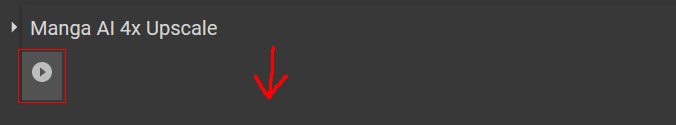

In [ ]:
#@title Manga AI 4x Upscale

import os
import torch
from google.colab import drive
from pathlib import Path

def init_dirs():
  Path("/content/gdrive/MyDrive/ESRGAN").mkdir \
   (parents=True, exist_ok=True)
  Path("/content/gdrive/MyDrive/ESRGAN/input").mkdir \
   (parents=True, exist_ok=True)
  Path("/content/gdrive/MyDrive/ESRGAN/output").mkdir \
   (parents=True, exist_ok=True)
  Path("/content/gdrive/MyDrive/ESRGAN/input-color").mkdir \
   (parents=True, exist_ok=True)
  Path("/content/gdrive/MyDrive/ESRGAN/output-color").mkdir \
   (parents=True, exist_ok=True)

# Checks recursively whether a folder contains any files
def dir_contains_files(path):
  for root, dirs, files in os.walk(path):
    if files:
      return True
  return False

def ai_process():
  !python ESRGAN/upscale.py -se -i /content/gdrive/MyDrive/ESRGAN/input \
  -o /content/gdrive/MyDrive/ESRGAN/output \
  ESRGAN/models/4x_eula_digimanga_bw_v2_nc1_307k.pth
  !python ESRGAN/upscale.py -se -i /content/gdrive/MyDrive/ESRGAN/input-color \
  -o /content/gdrive/MyDrive/ESRGAN/output-color \
  ESRGAN/models/4x-AnimeSharp.pth

# For easier localization
gdrive_connecting_text = "Trwa łączenie z Google Drive..."
gpu_not_available_text = "Ta sesja nie posiada karty graficznej.\n \
Aby podłączyć kartę graficzną, kliknij:\n'Edytuj' -> \
'Ustawienia notatnika' -> 'Akcelerator sprzętowy' = GPU; 'Typ procesora \
graficznego' = T4\nNastępnie uruchom ten skrypt ponownie."
created_dirs_text = "Foldery '/ESRGAN/input', '/ESRGAN/input-color', \
'/ESRGAN/output', '/ESRGAN/output-color' zostały stworzone na Twoim Google \
Drive.\nPrześlij strony mangi do folderu '/ESRGAN/input' i/lub \
'/ESRGAN/input-color' uruchom skrypt ponownie."
no_pages_found_text = "Nie znaleziono stron w folderach '/ESRGAN/input' oraz \
'/ESRGAN/input-color' na Twoim Google Drive.\nPrześlij strony mangi \
i uruchom ten skrypt ponownie."
finished_ai_text = "Przetwarzanie zostało zakończone. Wyniki można \
pobrać z '/ESRGAN/output' i/lub '/ESRGAN/output-color' na Twoim Google \
Drive.\nAby przetworzyć inne strony, uruchom ten skrypt ponownie. Jeśli nie \
planujesz w najbliższym czasie przetwarzać innych stron, zamknij bieżącą \
sesję.\nMożna to zrobić klikając w:\nodwrócony trójkąt (obok 'RAM' i 'Dysk' \
w prawym górnym rogu) -> 'Odłącz się od środowiska wykonawczego i \
usuń je'.\nSpowoduje to odblokowanie zasobów zarezerwowanych na tę \
sesję dla innych użytkowników."

def main():
  if not torch.cuda.is_available():
    print(gpu_not_available_text)
    return

  if not os.path.exists('/content/gdrive/MyDrive'):
    print(gdrive_connecting_text)
    drive.mount('/content/gdrive')

  if not os.path.exists('ESRGAN'):
    !git clone https://github.com/Spladenly/ESRGAN

  if not os.path.exists('/content/gdrive/MyDrive/ESRGAN'):
    init_dirs()
    print(created_dirs_text)
    return

  if not ((dir_contains_files('/content/gdrive/MyDrive/ESRGAN/input') and \
           dir_contains_files('/content/gdrive/MyDrive/ESRGAN/input-color'))):
    print(no_pages_found_text)
    return

  ai_process()

  print(finished_ai_text)

if __name__ == '__main__':
  main()


Chociaż obrazy można przesyłać bezpośrednio do folderów: /ESRGAN/input oraz /ESRGAN/input-color, jeśli trzeba przetworzyć wiele stron, ze względów technicznych szybciej jest przesłać archiwum niż 100+ plików. Więc, opcjonalnie można przesłać pliki ZIP i CBZ do folderów: /ESRGAN/input oraz /ESRGAN/input-color i uruchomić poniższy skrypt. Rozpakuje on wszystkie pliki ZIP i CBZ (do osobnych folderów) i przeniesie oryginalne pliki ZIP i CBZ do kosza.

In [ ]:
#@title Rozpakuj wszystkie pliki ZIP i CBZ w folderach /ESRGAN/input oraz /ESRGAN/input-color.

import os
import shutil
import zipfile
from google.colab import drive

# For easier localization
gdrive_connecting_text = "Trwa łączenie z Google Drive..."
found_text = "Znaleziono"
files_text = "plik(ów)."
extracting_text = "Rozpakowywanie..."
done_text = "Gotowe."
current_dir_text = "Bieżący folder:"

def unpack(input_dir):
  if not os.path.exists('/content/gdrive/MyDrive'):
    print(gdrive_connecting_text)
    drive.mount('/content/gdrive')

  zip_files = [f for f in os.listdir(input_dir) if f.endswith('.zip') or \
               f.endswith('.cbz')]

  print(f"{found_text} {len(zip_files)} {files_text}")
  print(extracting_text)

  for zip_file in zip_files:
      zip_path = os.path.join(input_dir, zip_file)

      extract_folder = os.path.join(input_dir, \
                                    os.path.splitext(zip_file)[0])
      os.makedirs(extract_folder, exist_ok=True)

      with zipfile.ZipFile(zip_path, 'r') as zf:
          zf.extractall(extract_folder)

      os.remove(zip_path)

def main():
  input_dir = '/content/gdrive/MyDrive/ESRGAN/input'
  input_color_dir = '/content/gdrive/MyDrive/ESRGAN/input-color'

  print(f"{current_dir_text} {input_dir}")
  unpack(input_dir)

  print(f"{current_dir_text} {input_color_dir}")
  unpack(input_color_dir)

  print(done_text)

if __name__ == '__main__':
  main()